In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
df=pd.read_csv(r'https://raw.githubusercontent.com/CodyDong/schulich_data_science/main/experiment_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


In [7]:
df.head(10)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


In [8]:
dfA = df[df['Variant']=='Variant A']
dfA.head(5)


,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
9,9,41,Location1,Device2,Variant A,27.642788,0.137266
13,13,30,Location2,Device3,Variant A,26.208502,0.087875
15,15,56,Location2,Device2,Variant A,7.800901,0.069781
17,17,41,Location2,Device3,Variant A,32.699437,0.114626


In [9]:
dfB=df[df['Variant']=='Variant B']
dfB.head(5)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341


In [10]:
dfControl=df[df['Variant']=='Control']
dfControl.head(5)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
8,8,54,Location3,Device2,Control,21.910608,0.135535
16,16,57,Location1,Device3,Control,37.527368,0.130966
19,19,42,Location1,Device3,Control,21.532687,0.081168
22,22,43,Location3,Device1,Control,16.171548,0.085845


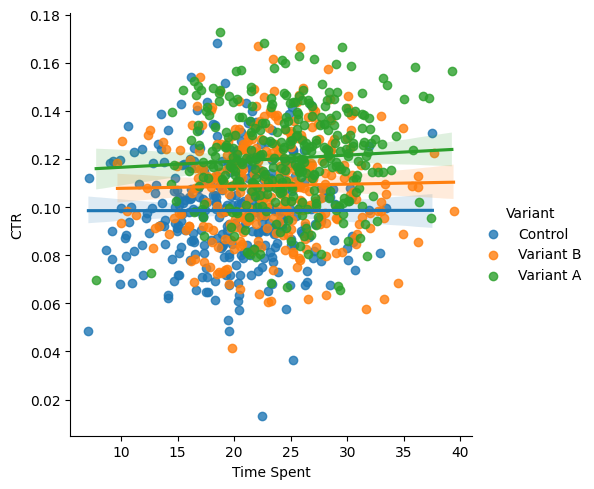

In [20]:
sns.lmplot(data = df, x='Time Spent', y='CTR', hue = 'Variant')

In [11]:
dfA.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,330.000000,330.000000,330.000000,330.000000
mean,503.448485,39.778788,24.805547,0.120269
std,292.544666,13.335836,4.964324,0.020109
min,7.000000,18.000000,7.800901,0.065667
25%,267.250000,28.000000,21.353587,0.107731
50%,492.000000,39.000000,24.955120,0.120203
75%,753.000000,51.000000,28.361732,0.134230
max,993.000000,64.000000,39.246751,0.172728


In [12]:
dfB.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,330.000000,330.000000,330.000000,330.000000
mean,499.427273,41.466667,23.343783,0.108933
std,287.500859,13.931676,5.239965,0.020988
min,1.000000,18.000000,9.681810,0.041402
25%,236.500000,29.000000,19.941617,0.095024
50%,513.500000,42.000000,23.198123,0.109100
75%,748.750000,53.000000,26.604511,0.123861
max,999.000000,64.000000,39.395770,0.166768


In [13]:
dfControl.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,340.000000,340.000000,340.000000,340.000000
mean,495.738235,40.894118,20.070781,0.098554
std,287.254421,13.679236,5.124183,0.020523
min,0.000000,18.000000,7.114806,0.012975
25%,248.000000,28.000000,16.516020,0.084686
50%,484.000000,41.000000,20.337480,0.098895
75%,737.500000,53.000000,23.313397,0.111160
max,997.000000,64.000000,37.527368,0.168363


In [14]:
t_stat, p_val = stats.ttest_ind(dfControl['CTR'], dfA['CTR'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -13.829424737499187
P-value: 1.9602781373243157e-38


In [15]:
t_stat, p_val = stats.ttest_ind(dfControl['Time Spent'], dfA['Time Spent'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -12.142363487472364
P-value: 8.488565644996449e-31


In [16]:
t_stat, p_val = stats.ttest_ind(dfControl['CTR'], dfB['CTR'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -6.4718143491783255
P-value: 1.8743198199982106e-10


In [17]:
t_stat, p_val = stats.ttest_ind(dfControl['Time Spent'], dfB['Time Spent'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -8.174237395991806
P-value: 1.496358076285182e-15


3. The result indicates the is a difference in average CTR and Time spent when variant A and B is implemented, especially Time spent. The average Time Spent increased by at least 3mins which is roughly 15% of the control group. As a result, both variants A and B had an impact on Time Spent and CTR, although the effect on CTR is minimal.  
Statistical tests between control, variant A, and variant B are conducted separately by CTR and Time Spent, where all tests resulted in a very small p-value. Therefore, there are significant differences before, and after they implement the changes to both variant A and variant B group. As the t-statistic result for comparison between the control group and variant A group is relatively greater than the control group and variant B group, it shows generally variant A has a greater impact on CTR and Time Spent. Therefore, the engineering team should deploy variant A feature.

4. As the result from the experiment shows, after implementing the variant A change, the average time spent on the product increased by 4 minutes and CTR increased by around 2.2%. Since the product is in digital format which means they are competing in a fast pace market,the product team should apply the change as soon as possible as the increased amount of CTR for the product could lead to potential revenue or more exposure to the audience. Close monitoring is required, as the experiment is only tested for a short period of time. Long-term wise, if the number shows a downfall in CTR and Time Spent with the product, the engineering team can quickly respond to that incident. 